# VISUALIZACIÓN DE LOS DATOS.
Con el objetivo de explorar más profundamente la información que los datos nos pueden aportar y así realizar un modelo más certero, emplearemos técnicas para **datasets de altas dimensiones**.

### ÍNDICE:
1. Imports.
2. Obtención y preprocesamiento de los datos. Conversión de matriz a dataframe de pandas.
3. Información básica del dataset.
4. PCA.
5. t-SNE.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import random

In [70]:
# Diccionario para codificar los nombres de las clases
categorical_encoder_class = {'RESIDENTIAL': 0,
    'INDUSTRIAL': 1,
    'PUBLIC': 2,
    'OFFICE': 3,
    'OTHER': 4,
    'RETAIL': 5,
    'AGRICULTURE': 6
}

categories_list = ['RESIDENTIAL', 'INDUSTRIAL', 'PUBLIC', 'OFFICE', 'OTHER', 'RETAIL', 'AGRICULTURE']

# Diccionario para codificar las variables no numéricas
categorical_encoder_catastral = {'A': -10,
    'B': -20,
    'C': -30,
    '""': 50
}

# Variable que contendrá las muestras
data = []

#Diccionario con los nombres de las variables, útil para las visualizaciones posteriores.
vars_dict = {}
vars_list = []

with open(r'Data/Modelar_UH2020.txt') as read_file:
    # La primera linea del documento es el nombre de las variables, no nos interesa
    vars_list = read_file.readline().split('|')
    i = 1
    for varname in vars_list[1:]:
        vars_dict[i] = varname
        i+=1

    # Leemos línea por línea adaptando las muestras al formato deseado (codificar el valor catastral y la clase)
    for line in read_file.readlines():
        # Eliminamos el salto de línea final
        line = line.replace('\n', '')
        # Separamos por el elemento delimitador
        line = line.split('|')
        if line[54] in categorical_encoder_catastral:
            line[54] = categorical_encoder_catastral[line[54]]
            if line[54] is 50:
                line[53] = -1
        line[55] = categorical_encoder_class[line[55]]
        # No nos interesa el identificador de la muestra, lo descartamos
        data.append(line[1:])

# Finalmente convertimos las muestras preprocesadas a una matriz
data = np.array(data).astype('float32')

#Convertimos dicha matriz a un dataframe de pandas.
modelar_df = pd.DataFrame(data = data)

In [33]:
# Variable que contendrá las muestras a predecir
data_predict = []

# Mismo procesamiento de datos que para el conjunto inicial
with open(r'Data/Estimar_UH2020.txt') as read_file:
    # La primera línea del documento es el nombre de las variables, no nos interesa
    read_file.readline()
    # Leemos línea por línea adaptando las muestras al formato deseado (codificar el valor catastral)
    for line in read_file.readlines():
        line = line.replace('\n', '')
        line = line.split('|')
        if line[54] in categorical_encoder_catastral:
            line[54] = categorical_encoder_catastral[line[54]]
            if line[54] is 50:
                line[53] = -1
        data_predict.append(line)

# Finalmente convertimos las muestras preprocesadas a una matriz (no numérica, nos interesa el id esta vez)
data_predict = np.array(data_predict)

#Convertimos dicha matriz a un dataframe de pandas.
estimar_df = pd.DataFrame(data = data_predict)
display(estimar_df)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,44198C2A811A4DF4,2200905624,165480229,1.10584744561493e-06,445.99963684082,634.001171875,780.000567626953,902.004052734375,1025.99700927734,1157.99768066406,...,2545.99775390625,6803.87510676301,283.593030129535,0.0467409453789218,0.0145877856470999,0.0112982860500111,0.774503157870107,1994,5,4
1,216F638609E0E39E,2207436564,165625751,0,385.000994873047,580.00576171875,737.004449462891,873.996459960938,1005.99877929688,1141.0017578125,...,2220.99013671875,5544.67048468287,357.712450020584,0.37848275069056,0.0410846343438618,0.0257532835436024,0.626834921495413,1968,8,3
2,FFFCEFB11E257364,2200313961,165752898,0,343.996612548828,567.010620117188,745.995483398438,900.997924804688,1051.99536132812,1200.00622558594,...,2421.00244140625,8827.10485632657,160.979017497573,0.306544978158063,0.0346374326721406,0.0549767723137622,1.58720690514632,1968,5,7
3,596C5C8CE10BCF,2199220382,166288192,0,173.999955749512,218,261.999713134766,315.999951171875,408.000564575195,560.000500488281,...,2752.00578613281,7734.75926913085,9088.67844814137,0.338954614074303,0.0068460327239788,0.00544755772368369,0.795724756705174,1993,6,6
4,F931B9FA2A8641D1,2209143550,165253334,6.931730240467e-06,588.002014160156,738.999450683594,848.001281738281,954.000244140625,1074.00018310547,1228.99829101562,...,2712.99768066406,7435.99149011245,994.424367638519,0.581476335633906,0.0364697301228575,0.0160334779018365,0.439637964082093,1964,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5613,EEDC412322324F11,2150225841,165784181,2.97092350720618e-11,244.000556945801,308.999572753906,358.000411987305,404.001129150391,452.999221801758,505.999176025391,...,2649.98901367188,4584.44526582052,92.6478675037215,0.145280321512103,0.0408989591210417,0.0383406180506849,0.937447281658555,1971,1,5
5614,C3ED06EF07E7B00D,2192030837,165800127,0,325.001498413086,513.997631835937,659.00390625,794.99453125,920.503753662109,1056.00202636719,...,2586.99807128906,6249.82899475595,152.576522522236,0.533303207858453,0.0303393455802747,0.11520737327121,3.79729262671085,1945,1,5
5615,C9625D1602A319E5,2169540519,165519808,1.49480081290676e-06,162.000358581543,198.000610351562,245.00057220459,329.001068115234,493.999450683594,700.002563476562,...,2871.99572753906,6006.85787541705,97.1984855099961,0.550830148545651,0.0642673521790889,0.0881795335307892,1.3720735418672,1999,1,4
5616,3A42595E9285B866,2225905882,165629885,0,316.997634887695,503.003845214844,655.999389648438,798.997314453125,941.999359130859,1097.00122070312,...,2347.99841308594,5448.08213161677,154.021555003924,0.486815330033655,0.0529100529116172,0.0597371565111755,1.12903225802784,1964,4,6


3. Mapa según la clase de terreno de cada punto.

In [15]:
residential_df = pd.DataFrame(modelar_df.loc[modelar_df[54] == 0])
industrial_df  = pd.DataFrame(modelar_df.loc[modelar_df[54] == 1])
public_df      = pd.DataFrame(modelar_df.loc[modelar_df[54] == 2])
office_df      = pd.DataFrame(modelar_df.loc[modelar_df[54] == 3])
other_df       = pd.DataFrame(modelar_df.loc[modelar_df[54] == 4])
retail_df      = pd.DataFrame(modelar_df.loc[modelar_df[54] == 5])
agriculture_df = pd.DataFrame(modelar_df.loc[modelar_df[54] == 6])

plt.scatter(residential_df.loc[1], residential_df.loc[2], c='r')
plt.scatter(industrial_df[1], industrial_df[2], c='dimgray')
plt.scatter(public_df[1], public_df[2], c='m')
plt.scatter(office_df[1], office_df[2], c='k')
plt.scatter(other_df[1], other_df[2], c='brown')
plt.scatter(retail_df[1], retail_df[2], c='g')
plt.scatter(agriculture_df[1], agriculture_df[2], c='lime')

plt.title('Mapa de la zona')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('Mapa Modular.png')
plt.show()

NameError: name 'r' is not defined

In [ ]:
count_df = pd.DataFrame(columns = categories_list)
for i in range(7):
    count_df[categories_list[i]] = [pd.DataFrame(modelar_df.loc[modelar_df[54] == i]).shape[0]]
count_df.plot(kind='bar', title='Número de elementos de cada clase')

[0.99927245 0.99986966 0.99995368 0.99997842 1.        ]


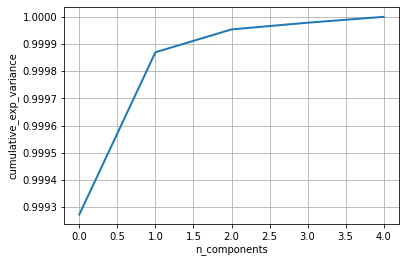

Perplexity =  40


ValueError: Could not interpret input 'tsne-2d-second'

In [84]:
#Obtener nombres de todas las columnas
features = list(modelar_df.columns.values)[:-1]
#Copias de los dataframes modelar(entrenamiento) y estimar(testeo).
modelar_df_copy = modelar_df
estimar_df_copy = estimar_df

modelar_df_copy.rename(columns={0:'ID',54:'Class'}, inplace=True)
modelar_df_copy = modelar_df_copy.drop('ID', 1)
X = modelar_df_copy.drop('Class', 1)

y = modelar_df_copy['Class']
copy_X['Class'] = y

pca = PCA(n_components=5)
pca_transform = pca.fit_transform(X)
copy_X['pca_first'] = pca_transform[:,0]
copy_X['pca_second'] = pca_transform[:,1]
copy_X['pca_third'] = pca_transform[:,2]
"""
plt.figure(figsize=(14,10))
sns.scatterplot(
x="pca_first", y="pca_second",
palette=sns.color_palette("hls", 7),
hue='Class',
data=copy_X,
legend="full",
alpha=0.3
)
plt.show()

ax = plt.figure(figsize=(14,10)).gca(projection='3d')
ax.scatter(
xs=copy_X["pca_first"],
ys=copy_X["pca_second"],
zs=copy_X["pca_third"],
c=copy_X['Class'],
cmap='tab10'
)
ax.set_xlabel('pca_first')
ax.set_ylabel('pca_second')
ax.set_zlabel('pca_third')
plt.show()
"""

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)
print(cum_var_explained)
plt.figure(2, figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_exp_variance')
plt.show()

perplexity = [40]

for perp in perplexity:
    tsne = TSNE(n_components=2, verbose=0, perplexity=perp, n_iter=300)
    tsne_results = tsne.fit_transform(copy_X[features[1:]].values)
    copy_X['tsne-2d-first'] = tsne_results[:,0]
    copy_X['tsne-2d-second'] = tsne_results[:,1]
    print('Perplexity = ',perp)
    plt.figure(figsize=(14,10))
    sns.scatterplot(
    x="tsne-2d-first", y="tsne-2d-second",
    hue="y",
    palette=sns.color_palette("hls", 7),
    data=copy_X,
    legend="full",
    alpha=0.3
    )
    plt.show(block=False)

explained_variance_ratio_ = pca.explained_variance_ratio_
evr_df = pd.DataFrame(explained_variance_ratio_)

evr_df.plot.pie(y=0, figsize=(5,5))
print(explained_variance_ratio_)
i = 0
index = 0
for item in explained_variance_ratio_:
    i+=item
    print('La componente principal nº {} es responsable del {} por ciento de la varianza.'.format(index, item*100))
    index += 1
i*=100
print('Captura el {} por ciento de la información total'.format(i))

